# Twitter Analysis 

# Setup
The setup files include `twitterdatacollect.py`, `create_dataframe.py` and `load_pickle.py`.

The script `twitterdatacollect.py` collects tweets made by Donald Trump and Elon Musk and their replies using Tweepy and then stores it in a Mongodb Database. The created Mongodb dump is present in the dump directory. 

In the script, `create_dataframe.py`, I have fetched only the required data from the database, such as the tweets, their date of creation, location etc. Using that I created the following dataframes:
* df_trump_tweets which are the tweets posted by Donald Trump aka @realDonaldTrump, 
* df_trump_replies are the tweets posted by people as replies to the posts made by Donald Trump
* df_elon_tweets are the tweets posted by Elon Musk (@elonmusk)
* and df_elon_replies has the replies to the posts by Elon Musk.
The data is more structured that way.

I stored the dataframes using pickle so that their values can be quickly refrenced inside any file as they would be integral to all the analysis that has to be done. 

`load_pickle.py` loads those dataframes.

For setup: You can simply use 
`from load_pickle import df_trump_tweets as tt, df_trump_replies as tr, df_elon_tweets as et, df_elon_replies as er` in any file where you would like to access the dataframes in. 
To collect twitter data, run twitterdatacollect.py

# Sentiment Analysis

For sentiment analysis, I used `textblob` which is a popular python library, used for processing data. TextBlob (apart from it's many other cool NLP functions) gives an accurate measure of polarity and subjectivity of any text. A polarity < 0 indicates that the sentiment expressed is negative, where as a polarity > 0 indicates that the sentiment is positive. Polarity = 0 represents neutral sentiment. 
Subjectivity also varies from 0 to 1. 
The library used for most of the plotting is `plotly`. Plotly offers versatality and interactive graphs on a jupyter notebook and is also easy to use. It has some really amazing features like display of values on hover (so you dont need to look at the axis anymore). You can also click on the legends to make the respective graphs appear and disappear. For example: on the scatter plots, simply click on the legend to see only one plot. It makes analysis a lot more easier!

As for the code part: 
* In the create_dataframes file, I have fetched the text from all the tweets and using the clean tweets function, I removed all the links and hashtags to give a better analysis of the tweets. Then I calculated their sentiment and polarity using textblob and stored them in the dataframes. Therefore the sentiment values are directy imported when we import the load_pickle file.
* The function plot_sentiment is used to plot a scatter graph of Polarity v/s subjectivity for Tweets and their replies. It is easily noticible that the graph is more concentrated towards the center for the replies whereas for Tweets its more inclined to the right which shows that tweets are in general more positive than the replies.  

In [57]:
# #Function to get processed tweets and their polarity from create_dataframes.py file
# def clean_tweet(tweet):
#     return ' '.join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
#     #taken from https://gist.github.com/eledroos/efbe501f359d9791019b19e9ea9d60b6

# def add_analysis(df):
#     clean_tweets_list=[]
#     subjectivity_list=[]
#     polarity_list=[]
#     for tweet in df['text']:
#         tweetnew=clean_tweet(str(tweet))           #clean the tweet
#         clean_tweets_list.append(tweetnew)      #Append the clean tweet to a list
#         analysis=TextBlob(tweetnew)       #Analyse the sentiment of the clean tweet
#         subjectivity_list.append(analysis.sentiment.subjectivity)   
#         polarity_list.append(analysis.sentiment.polarity)
#     df_new = pd.DataFrame({'id_str': df['id_str'],'processed_tweet': clean_tweets_list,'subjectivity': subjectivity_list,'polarity': polarity_list})
#     return pd.DataFrame.merge(df,df_new)


In [58]:
import re
from textblob import TextBlob
from load_pickle import df_trump_tweets as tt, df_trump_replies as tr, df_elon_tweets as et, df_elon_replies as er
import plotly.plotly as py
import plotly.graph_objs as go

#list_collections = ['trump_tweets','trump_replies','elon_tweets','elon_replies']

Plotly uses API calls to plot graph, the maximum limit is around 20-25 graphs. You can create your API keys from 
or you can uncomment any of the lines below.

In [59]:
import plotly
#plotly.tools.set_credentials_file(username='sonali18317', api_key='AztkaqxkMkq2bQ1n6rL2') #Already used
#plotly.tools.set_credentials_file(username='yopechenga', api_key='5vh9jlqPkXatKDOBmTQp')  #Already used
#plotly.tools.set_credentials_file(username='bopechenga', api_key='f8ATeyYGMXsO7ANHQnVT')   #Already used
plotly.tools.set_credentials_file(username='bope_chenga', api_key='Hqutc0MltLQoLyX9ol39')
#plotly.tools.set_credentials_file(username='bope.chenga', api_key='ubb9JG40ceoU9yhgdNHq')

In [60]:
def plot_sentiment(d1,d2,color1,color2,title):
    trace0 = go.Scatter(
        x = d1['polarity'],
        y = d1['subjectivity'],
        name = 'Tweets',
        mode = 'markers',
        marker = dict(
            size = 10,
            color=color1,
            line = dict(
                width = 2,
                color = 'rgb(0, 0, 0)'
            )
        )
    )

    trace1 = go.Scatter(
        x = d2['polarity'],
        y = d2['subjectivity'],
        name = 'Replies',
        mode = 'markers',
        marker = dict(
            size = 10,
            color = color2,
            line = dict(
                width = 2,
            )
        )
    )

    data = [trace0, trace1]

    layout = dict(title = title,
                  yaxis = dict(zeroline = False, title='Subjectivity'),
                  xaxis = dict(zeroline = False, title = 'Polarity'),
                 )

    fig = go.Figure(data=data, layout=layout)
    return fig



In [61]:
fig=plot_sentiment(tt,tr,'rgba(0, 151, 102, 1)','rgba(255, 182, 193, .8)','Sentiment analysis of Trump Tweets')
py.iplot(fig)

In [62]:
fig=plot_sentiment(et,er,'rgba(0, 104, 0, 1)','rgba(204,215, 10, .8)','Sentiment analysis of Elon Musk Tweets')
py.iplot(fig)



For a more comprehensive analysis, I have used bar graphs, which are simple and easy to understand. I have plotted the positivity, negativity and neutrality percentage and compared them for Tweets and replies. You can also click on the legends to see the polarity percentage of either one individually.
The graph also shows that the positivity sentiment of tweets were much greater than their replies.

In [63]:
df=[tt['polarity'],tr['polarity'],et['polarity'],er['polarity']]
sentiment=[]
for d in df:
    p=0
    n=0
    r=0
    for i in d:
        if i>0:
            p+=1
        elif i<0:
            n+=1
        else:
            r+=1
    t=n+r+p
    sentiment.append([p/t*100,n/t*100,r/t*100])


In [64]:
trace1 = go.Bar(
    x=['Positive', 'Neutral', 'Negative'],
    y=[sentiment[0][0], sentiment[0][2], sentiment[0][1]],
    name='Trump Tweets'
)
trace2 = go.Bar(
    x=['Positive', 'Neutral', 'Negative'],
    y=[sentiment[1][0], sentiment[1][2], sentiment[1][1]],
    name='Replies to Trump Tweets'
)

data = [trace1, trace2]
layout = go.Layout(title = 'Sentiment of Trump tweets',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

As similar analysis for Elon Musk tweets

In [65]:
trace1 = go.Bar(
    x=['Positive', 'Neutral', 'Negative'],
    y=[sentiment[2][0], sentiment[2][2], sentiment[2][1]],
    name='Elon Musk Tweets',
    marker=dict(color='rgb(144, 12, 63,1)'),
)
trace2 = go.Bar(
    x=['Positive', 'Neutral', 'Negative'],
    y=[sentiment[3][0], sentiment[3][2], sentiment[3][1]],
    name='Replies to ELon Tweets',
    marker=dict(color='rgb(255, 195, 0,1)'),
)

data = [trace1, trace2]
layout = go.Layout(title = 'Sentiment of Elon Musk tweets',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Content Analysis

I thought the best way to plot the content would be a word cloud since it gives a nice idea about the content of the tweet in a very attractive way. 
The library used for this purpose are `wordcloud` and `matplotlib`. 
For the analysis, I simply used the processed_tweets created in the createdataframes.py
Function `maketext` uses the text from the tweets and creates a huge string from it. It is analysed using wordcloud and plotted using matplotlib.

In [66]:
from load_pickle import df_trump_tweets as tt, df_trump_replies as tr, df_elon_tweets as et, df_elon_replies as er
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
%matplotlib inline

In [67]:
tweetListtrump=list(tt['processed_tweet'])+list(tr['processed_tweet'])
tweetlistelon=list(et['processed_tweet'])+list(er['processed_tweet'])
stopwords = set(STOPWORDS)
stopwords.update(["REALDONALDTRUMP",'WILL','ELONMUSK'])
#removed realdonaldtrump as it occurs in every tweet and hence redundant for analysis
def make_text(l):
    text = ' '
    for val in l:
        # separate words
        tokens = val.split() 
        # Converts every word into UPPERCASE
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].upper() 
        for words in tokens: 
            text = text + words + ' '
    return text

In [68]:
def createAndShowWordCloud(tweetList):
    text1=make_text(tweetList)
    wordcloud = WordCloud(background_color ='white', stopwords = stopwords, collocations=False, min_font_size = 1,width=1600, height=800).generate(text1)
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.rcParams['figure.figsize'] = [200, 50]
    plt.show() 

The wordcloud shows valuable information. For example, the most prominant topics of Trump tweets are Fox news, people and Bush which matches with his recently posted tweets and replies. 
For example, a post by Donald Trump: 
_'Looking forward to being with the Bush family. This is not a funeral, this is a day of celebration for a great man who has led a long and distinguished life. He will be missed!'_


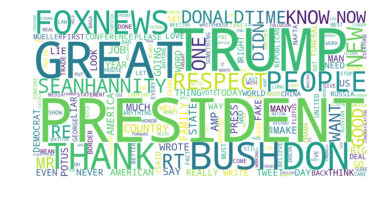

In [69]:
createAndShowWordCloud(tweetListtrump)

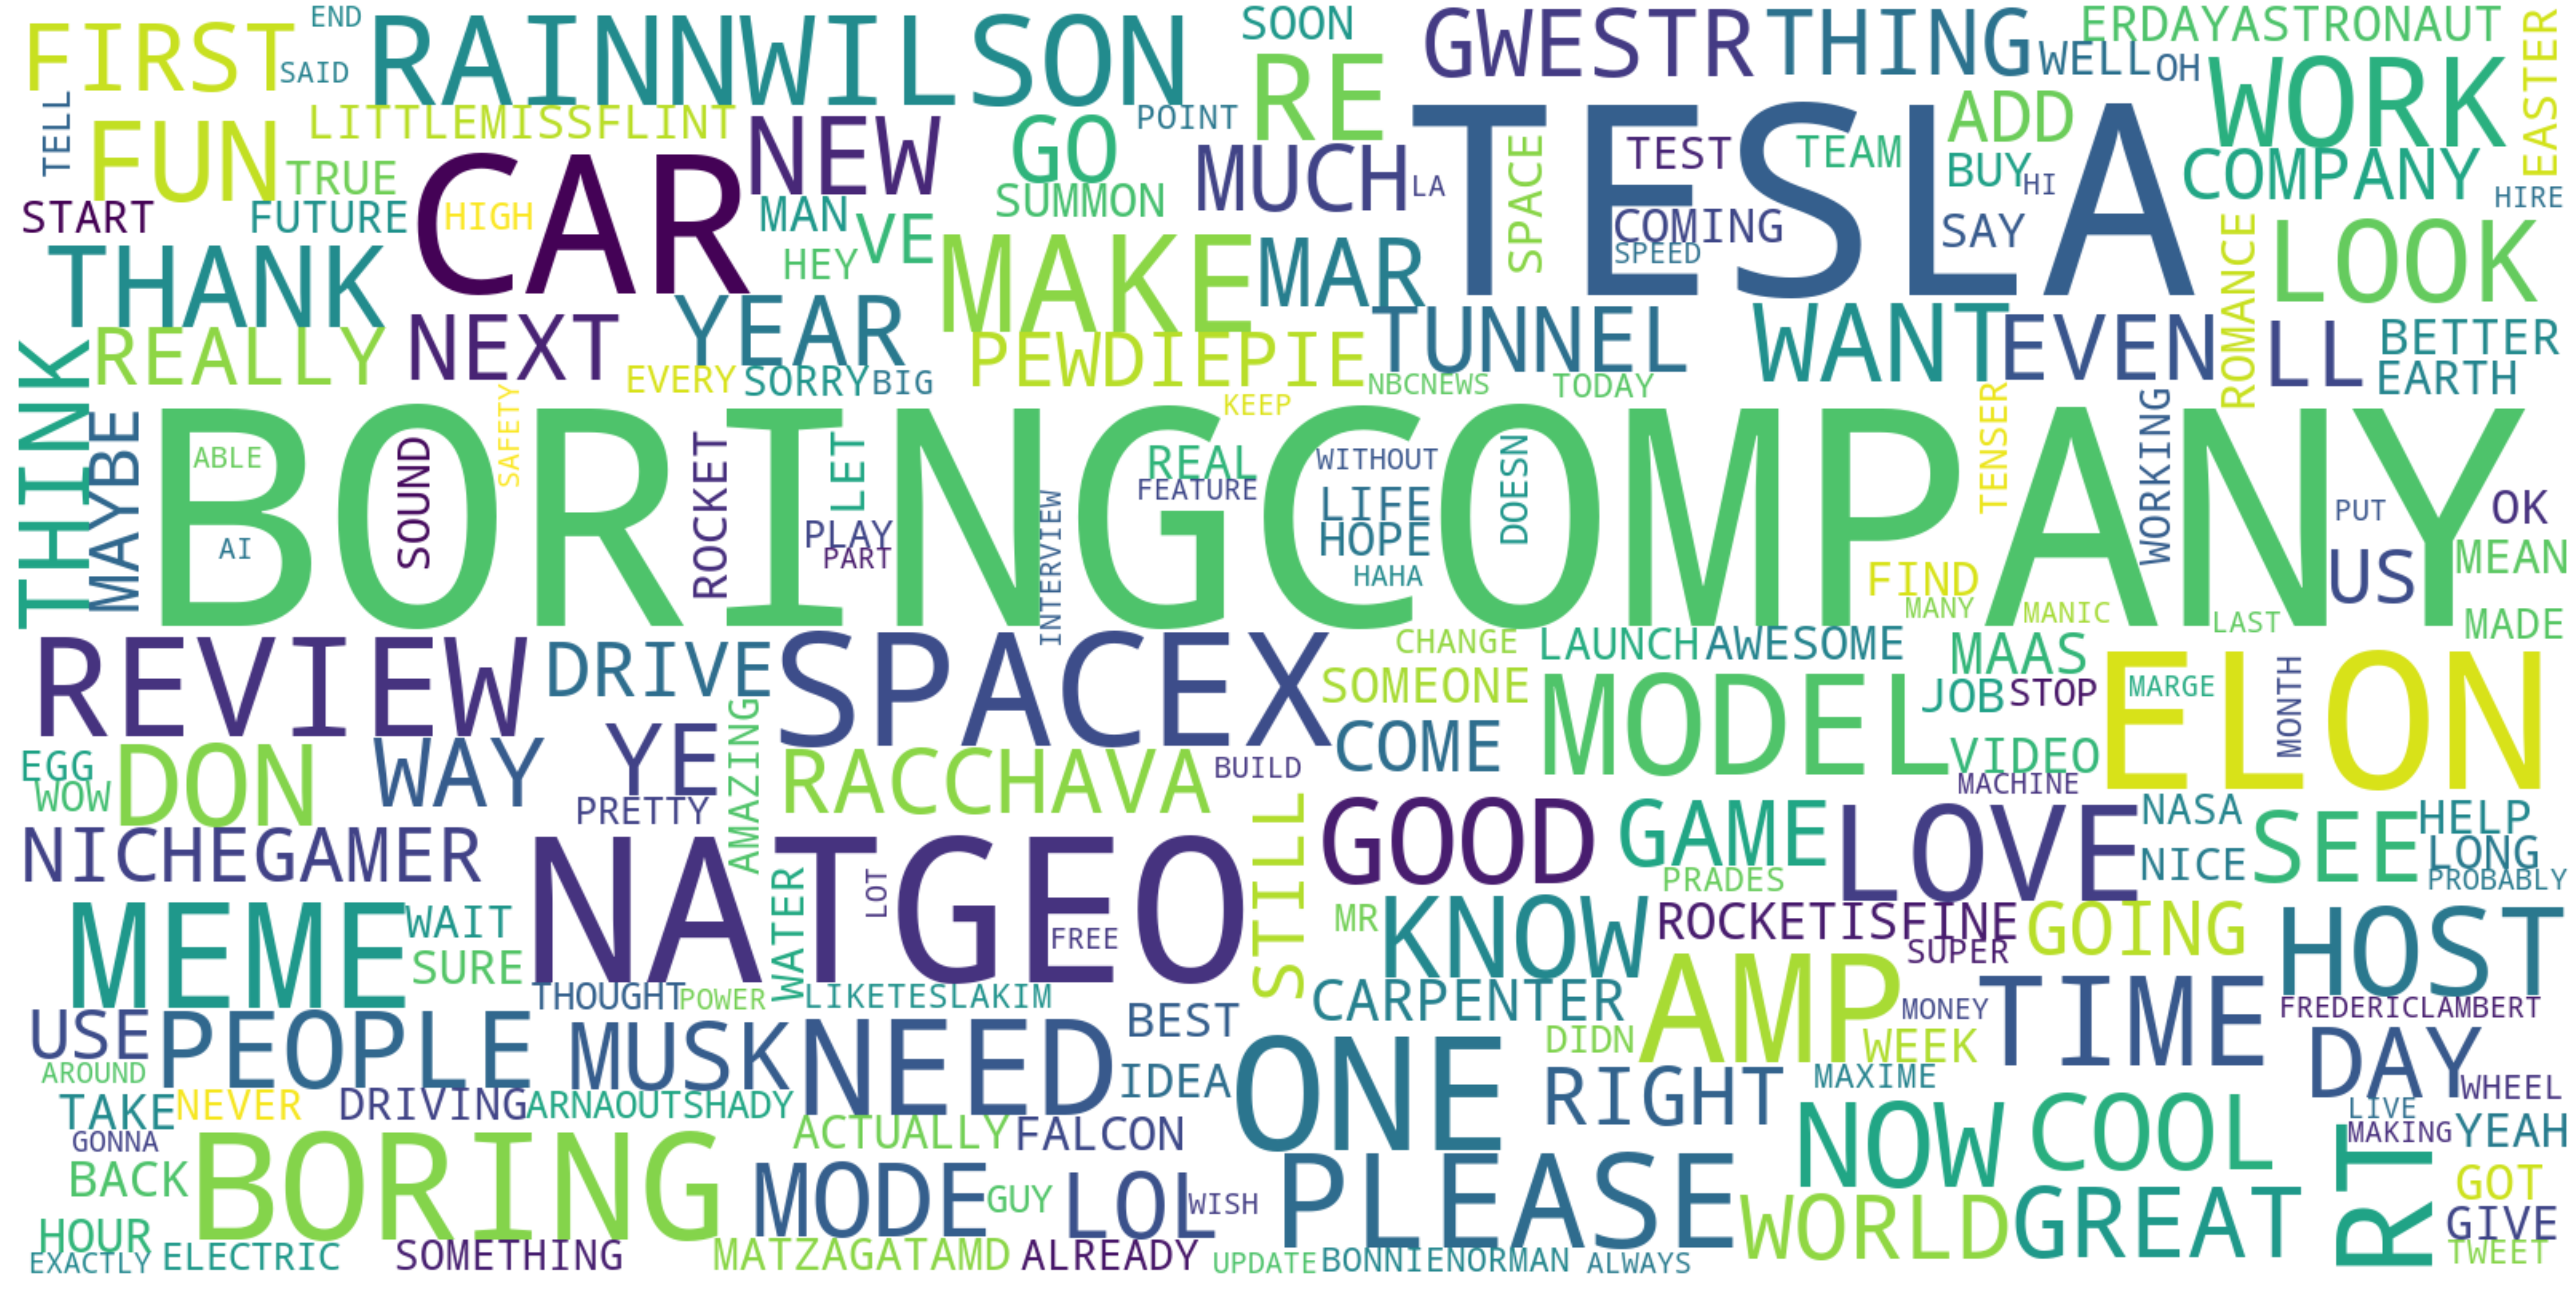

In [70]:
createAndShowWordCloud(tweetlistelon)
#ElonMusk Tweets

# Temporal analysis
For the temporal analysis, I used `dateutil` module to change the type-string date from the dataframe to the date format. The graph is plotted using the plotly range selector. 

I have collected around 3k tweets each of Elon Musk and Donald Trump. I have about 10K replies for each. A reply is taken such that it is in response to any one of the 3k collected tweets. The collected Tweets vary over a span of an year whereas the replies are of a very short duration: about 10k only in one day. 

The frequency of the posts are plotted separately for Tweets and replies. You can vary the time slider below the graph to analyse the frequency for any given time interval. The buttons `1m`, `6m` and `all` can also be selected to analyse the graph for various time intervals. 

In [71]:
from dateutil.parser import parse

def get_time_occurance(l):
    date_dict={}
    for d in l:
        d=parse(d)
        d=d.strftime('%Y-%m-%d')
        if d not in date_dict:
            date_dict[d]=1
        else:
            date_dict[d]+=1
    return date_dict


In [72]:
d1=get_time_occurance(tt['created_at'])
d2=get_time_occurance(et['created_at'])
d3=get_time_occurance(tr['created_at'])
d4=get_time_occurance(er['created_at'])


In [73]:
def create_graph(d1,d2,name1,name2,tit):
    trace_high = go.Scatter(
        x=list(d1.keys()),
        y=list(d1.values()),
        name = name1,
        line = dict(color = '#17BECF'),
        opacity = 0.8)

    trace_low = go.Scatter(
        x=list(d2.keys()),    
        y=list(d2.values()),
        name = name2,
        line = dict(color = '#7F7F7F'),
        opacity = 0.8)

    data = [trace_high,trace_low]

    layout = dict(
        title=tit,
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1m',
                         step='month',
                         stepmode='backward'),
                    dict(count=6,
                         label='6m',
                         step='month',
                         stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date'
        )
    )

    fig = dict(data=data, layout=layout)
    return [fig,tit]


In [74]:
temp = create_graph(d1,d2,'Trump Tweets','Elon Tweets','Temporal analysis of Tweets')
py.iplot(temp[0], filename = temp[1])

In [75]:
temp = create_graph(d3,d4,'Trump Replies','Elon Replies','Temporal analysis of Replies')
py.iplot(temp[0], filename = temp[1])

# Spatial Analysis

For the spacial analysis, I have plotted tweet reply frequencies on a world map. The less darker areas represent countries with lesser reply-tweets posted as compared to the darker ones. You can hover over the graph to see the number of tweets and the respective country name.

* The functions fetch country codes from the `countrycodes.csv` file, which is used for plotting the countries on the map. 
* The `get_country` function filters the relevant locations from the tweets and stores them. The `get_frequency` function is used to calculate the amount of tweets from each location.
* I used the __location__ parameter of the tweets to plot this data since that latitude longitude coordinates were not available for most of the tweets and hence, the data was not enough for conclusive analysis. A drawback with user location is that it is user defined, so I had to filter the relevant locations from the collected location data. 
* I removed the locations which were untrue such as 'Milkyway' and 'earth'. For this purpose I used `pycountry` module. 


Surprisingly, only 1K out of 10k tweets had correct locations! Despite the less data, the graph still gives somewhat accurate analysis, such as the highest number of replies for Donald Trump are from USA. 

In [76]:
import pandas as pd
import pycountry

In [77]:
def get_country(text): #scan location text to fetch valid countries
    for country in pycountry.countries:
        if country.name in text:
            return country.name
    return None

In [78]:
csvFileDF = pd.read_csv('countrycodes.csv')
all_codes = {}
for index, row in csvFileDF.iterrows(): 
    c=get_country(row['COUNTRY'])
    if c!=None:
        all_codes[c]=row['CODE']

In [79]:
def get_all_countries(df):
    all_countries=[]    #compile all the countries in a list
    for val in df:
        l=get_country(val['location'])
        if l!=None:
            all_countries.append(l)
    return all_countries

In [80]:
def get_frequency(df):
    all_countries=get_all_countries(df)
    frequency={}    #Get frequency of each country
    for l in all_countries:
        if l not in frequency:
            frequency[l]=1     #add country's frequency as 1
        else:
            frequency[l]+=1    #Increase country's frequency as 1
    return frequency

In [81]:
def plotdata(df):
    freq=get_frequency(df)
    countries=freq.keys()
    y=[]
    z=[]
    total=0
    locn=[]
    for country in countries:
        if country in all_codes.keys():
            y.append(all_codes[country])
            z.append(freq[country])
            locn.append(country)
            total+=freq[country]
    print('Total countries that were plotted out of 10k Tweets: ',total)
    return y,z,locn

In [82]:
def plot_worldmap(y,z,locn,title):
    
    data = [ dict(
            type = 'choropleth',
            locations = y,  ##modify this to include list of codes of countries 
            z = z,
            text = locn ,
            colorscale = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']],
            autocolorscale = False,
            reversescale = False,
            marker = dict(
                line = dict (
                    color = 'rgb(180,180,180)',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = 'Number of tweets'),
          ) ]

    layout = dict(
        title = title,
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    return fig

In [83]:
y,z,locn=plotdata(tr['user'])
fig= plot_worldmap(y,z,locn,'Spacial analysis of Trump Tweets')
py.iplot( fig, validate=False, filename='d3-world-ma' )

Total countries that were plotted out of 10k Tweets:  947


In [85]:
y,z,locn=plotdata(er['user'])
fig= plot_worldmap(y,z,locn,'Spacial analysis of Elon Musk Tweets')
py.iplot( fig, validate=False, filename='d3-world-ma' )

Total countries that were plotted out of 10k Tweets:  1381


# References
 
 ### For setup: Twitter and MongoDb
* https://stackoverflow.com/questions/2265357/parse-date-string-and-change-format
* https://marcobonzanini.com/2015/06/16/mining-twitter-data-with-python-and-js-part-7-geolocation-and-interactive-maps/
* https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/
* https://tweepy.readthedocs.io/en/v3.5.0/
* https://tweepy.readthedocs.io/en/v3.5.0/code_snippet.html#oauth
* https://stats.seandolinar.com/collecting-twitter-data-storing-tweets-in-mongodb/
* https://stackoverflow.com/questions/2693553/replies-to-a-particular-tweet-twitter-api
* https://pythondata.com/collecting-storing-tweets-with-python-and-mongodb/
* https://stellamindemography.wordpress.com/2018/05/04/mining-data-from-twitter-and-replies-to-tweets-with-tweepy/
* https://bhaskarvk.github.io/2015/01/how-to-use-twitters-search-rest-api-most-effectively./

### Word cloud 
* https://stackoverflow.com/questions/28786534/increase-resolution-with-word-cloud-and-remove-empty-border
* https://www.geeksforgeeks.org/generating-word-cloud-python/
* https://www.datacamp.com/community/tutorials/wordcloud-python

 
### Plotly 
* https://plot.ly/python/bar-charts/
* https://plot.ly/python/colorscales/
* https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf?_ga=2.217450070.1320144882.1543863266-1478253125.1543825849
* https://plot.ly/python/choropleth-maps/#world-choropleth-map
* https://plot.ly/python/line-and-scatter/

### Sentiment Analysis
* https://www.youtube.com/watch?v=o_OZdbCzHUA  
* https://www.displayr.com/sentiment-analysis-simple/
* http://www.filipyoo.com/topic-and-sentiment-analysis-using-twitter-api/
* https://stackoverflow.com/questions/16249736/how-to-import-data-from-mongodb-to-pandas

### Temporal analysis
* https://stackoverflow.com/questions/2265357/parse-date-string-and-change-format
* https://www.w3schools.com/python/python_datetime.asp
* https://plot.ly/python/time-series/
* https://docs.python.org/2/library/datetime.html
* https://plot.ly/python/range-slider/#basic-range-slider-and-range-selectors
* https://stackoverflow.com/questions/14524322/how-to-convert-a-date-string-to-different-format

### Spatial analysis
* https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv
* https://plot.ly/python/choropleth-maps/#world-choropleth-map
* https://www.datacamp.com/community/tutorials/pandas-read-csv
* https://stackoverflow.com/questions/36684013/extract-column-value-based-on-another-column-pandas-dataframe
* https://pypi.org/project/pycountry/